<a href="https://colab.research.google.com/github/All4Nothing/hg-mldl/blob/main/6-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

## 차원과 차원 축소

데이터가 가진 속성을 특성이라 부르는데, 머신러닝에서는 이런 특성을 **차원 dimension**이라고도 부른다.

특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합이 된다.  
**차원 축소 dimensionality reduction**는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다

**주성분 분석 principal component analysis** **PCA**

## 주성분 분석 소개

주성분 분석은 데이터에 잇는 분산이 큰 방향을 찾는 것으로 이해할 수 있다

**주성분 principal component** 벡터는 원본 데이터에 있는 어떤 방향

## PCA 클래스

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-07-17 06:47:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-17 06:47:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-17 06:47:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [3]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # n_compoents : 주성분의 개수
pca.fit(fruits_2d)

PCA(n_components=50)

In [11]:
print(pca.components_.shape) # (주성분 개수, 원본 데이터의 특성 개수)

(50, 10000)


In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

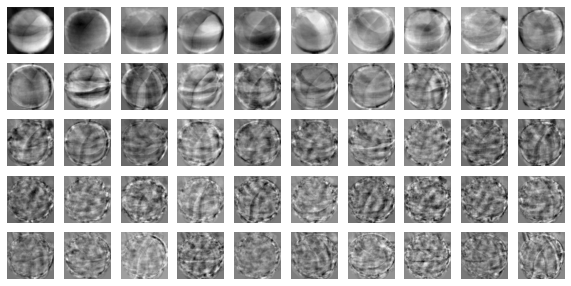

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [9]:
print(fruits_2d.shape)

(300, 10000)


특성의 개수를 10,000개에서 50개로 줄일 수 있다.

In [10]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


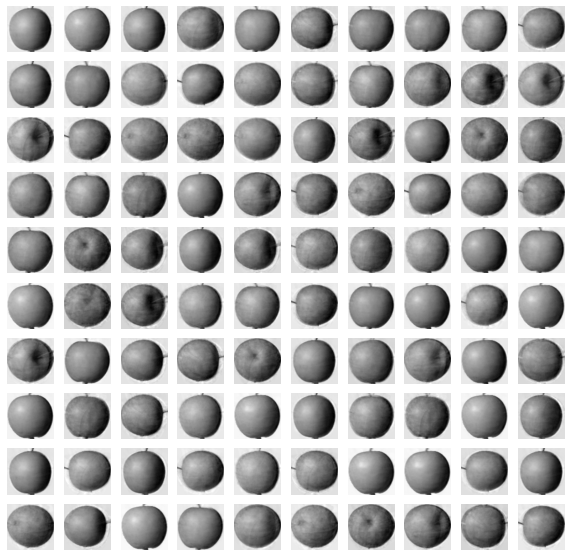

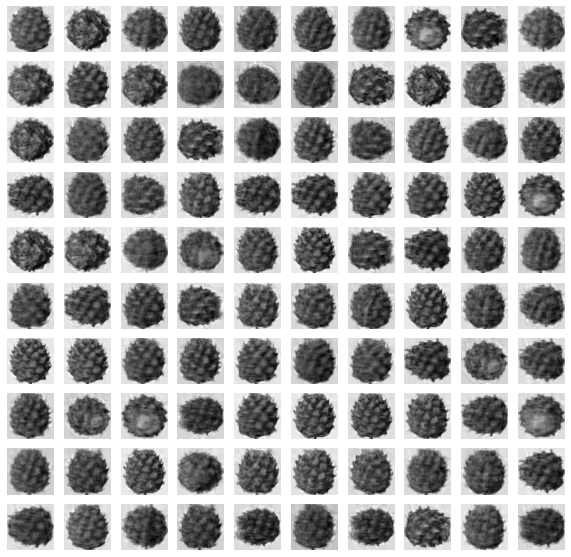

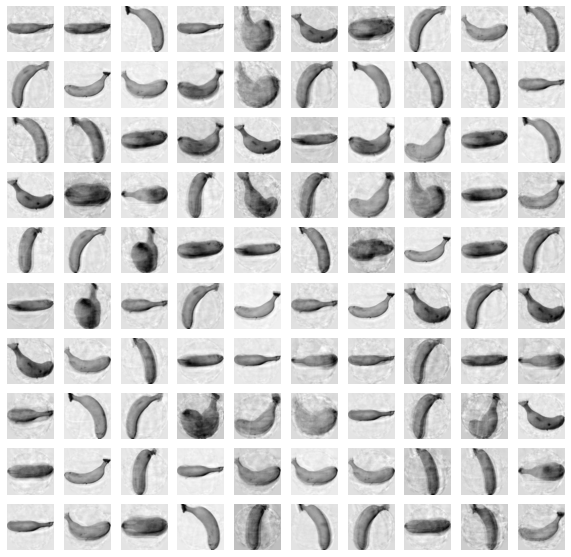

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

50개의 특성을 10,000개로 늘린 것. 50개의 특성이 분산을 가장 잘 보존하도록 변환되었기에 복원이 잘 될 수 있었다.


## 설명된 분산 

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산 explained variance**

In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.921596334241414


92%가 넘는 분산을 유지하고 있다.

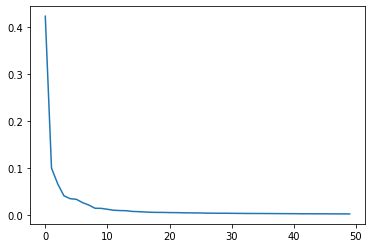

In [16]:
plt.plot(pca.explained_variance_ratio_)

10개의 주성분이 대부분의 분산을 표현하고 있다.

## 다른 알고리즘과 함께 사용하기

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [18]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [20]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1124205112457275


교차 검증의 점수 0.997, 교차 검증 폴드의 훈련시간 0.94초

In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.05716233253479004


특성 50개 사용, 정확도 100%, 훈련 시간은 0.03초

`n_components` 매개변수에 주성분의 개수가 아닌, 지정된 비율에 도달할 때까지 자동으로 주성분을 찾도록 지정

In [23]:
pca = PCA(n_components=0.5) # 설명된 분산의 50%에 달하는 주성분을 찾도록
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
print(pca.n_components_) # 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

2


In [32]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)

(300, 2)


In [34]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # 2개의 특성을 사용하여 99%의 정확도 달성
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.99
0.07903575897216797


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


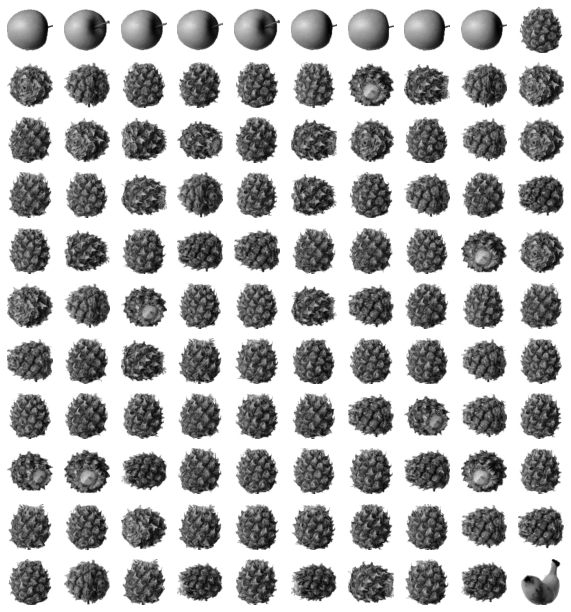

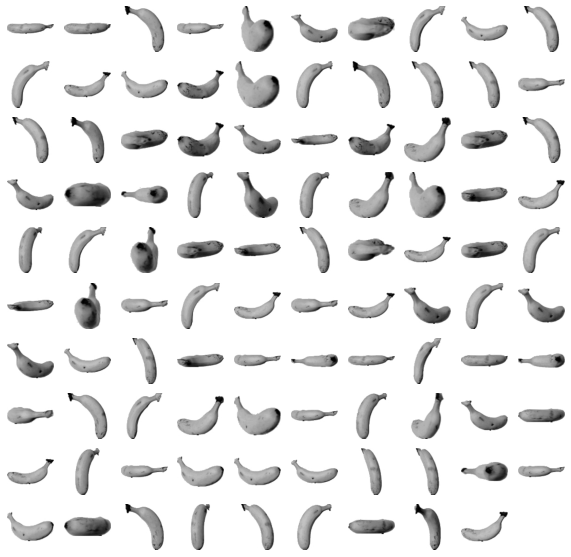

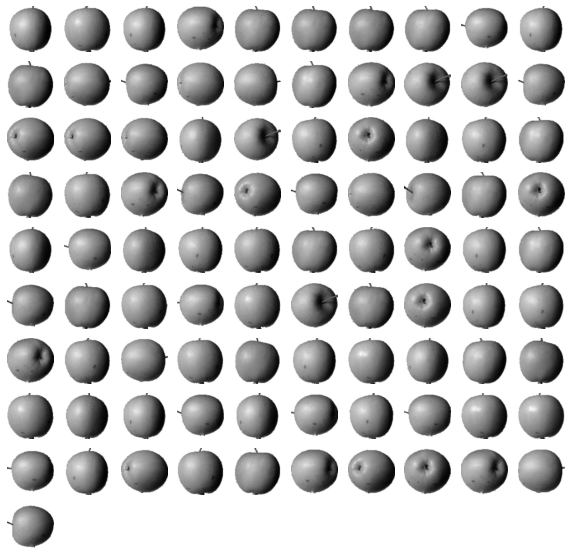

In [37]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

훈련 데이터의 차원을 3개 이하로 줄이면 화면에 출력하기 쉽다.

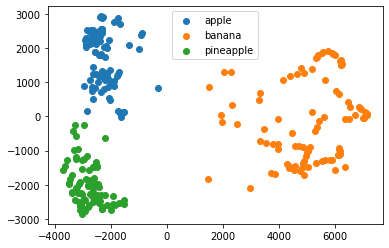

In [38]:
for label in range(0,3 ):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()